# Preprocess


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Loan_data_part_I.csv to Loan_data_part_I.csv


In [0]:
df_loan = pd.read_csv(io.StringIO(uploaded['Loan_data_part_I.csv'].decode('utf-8')))

In [0]:
df_loan = pd.read_csv("/Users/wuyating/Desktop/Assignment/Loan_data_part_I.csv")
df_loan.head()

,loan_status,loan_amnt,term,int_rate,sub_grade,installment,annual_inc,emp_length,dti,fico_range_high,...,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit
0,Current,4800.0,36.0,19.20,17,176.44,36000.0,10.0,18.97,664.0,...,1.0,1.0,3967.0,94.5,0.0,16019.0,25093.0,13.0,16019.0,4200.0
1,Current,21000.0,36.0,13.11,8,708.69,90000.0,6.0,16.75,699.0,...,0.0,0.0,35234.0,90.3,0.0,38768.0,54907.0,24.0,38768.0,35900.0
2,Current,10750.0,36.0,15.80,12,376.88,47000.0,10.0,14.09,679.0,...,0.0,0.0,8247.0,56.9,0.0,14233.0,21285.0,16.0,14233.0,6700.0
3,Current,10200.0,60.0,15.61,13,245.94,60000.0,6.0,21.30,684.0,...,0.0,0.0,12834.0,70.1,0.0,145664.0,187118.0,32.0,21069.0,7800.0
4,Current,9500.0,36.0,13.11,8,320.60,106000.0,10.0,9.76,694.0,...,0.0,0.0,18345.0,31.7,0.0,18345.0,57800.0,54.0,18345.0,31200.0


In [0]:
df_loan["home_ownership"]=df_loan["home_ownership"].astype("category")
df_loan["purpose"]=df_loan["purpose"].astype("category")
df_loan["sub_grade"]=df_loan["sub_grade"].astype("category")
df_loan["verification_status"]=df_loan["verification_status"].astype("category")
df_loan["loan_status"]=np.where(df_loan["loan_status"] == 'Fail',"1","0")
df_loan["loan_status"]=df_loan["loan_status"].astype("category")
df_loan.dtypes

loan_status              category
loan_amnt                 float64
term                      float64
int_rate                  float64
sub_grade                category
installment               float64
annual_inc                float64
emp_length                float64
dti                       float64
fico_range_high           float64
verification_status      category
purpose                  category
home_ownership           category
avg_cur_bal               float64
delinq_2yrs               float64
delinq_amnt               float64
earliest_cr_line          float64
inq_last_6mths            float64
num_accts_ever_120_pd     float64
num_actv_bc_tl            float64
num_bc_tl                 float64
num_il_tl                 float64
num_op_rev_tl             float64
num_rev_accts             float64
num_tl_90g_dpd_24m        float64
percent_bc_gt_75          float64
pub_rec                   float64
pub_rec_bankruptcies      float64
revol_bal                 float64
revol_util    


#Q1




1.(10 points) Apply three different machine-learning techniques: linear discriminant analysis (LDA), Random Forest classification (with 100 trees), and 50-NN to the FULL-MODEL and entire dataset in order to predict loan default. To obtain a measure of how good each technique is at using these attributes to predict default, compute the confusion matrix of each measure, using the method of 10-fold cross validation. Complete the following tables with the confusion matrices of each method for prediction (note: please normalize all confusion matrices by dividing each cell by its column-total, such that it reacts the share of predicted observations that fall in that outcome category (Current or Default) and both columns sum up to 1).

In [0]:
y=df_loan["loan_status"]
X=df_loan.iloc[:,df_loan.columns!="loan_status"]

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [0]:
kf = KFold(n_splits = 10, shuffle = False)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import metrics
# Classifier
model_dict = {
    'LDA':LinearDiscriminantAnalysis()
    ,'Random Forest':RandomForestClassifier(n_estimators=100)
    ,'KNN':KNeighborsClassifier(n_neighbors=50)
}

In [0]:
def main(X, i = 0):  
  for model in model_dict:    
    # Initialize the array to zero which will store the confusion matrix
    array = [[0,0],[0,0]]
    
    # For each train-test split: train, predict and compute the confusion matrix
    for train_index, test_index in kf.split(X):
      X_train_raw, X_test_raw = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # Whether balancing data
      if i == 1:
        X_train_raw, y_train = RandomUnderSampler(random_state=0).fit_sample(X_train_raw,y_train)
      else:
        pass
        
      # Feature Scaling
      stdsc = StandardScaler()
      X_train = stdsc.fit_transform(X_train_raw)
      X_test = stdsc.transform(X_test_raw)
    
      # Train the model
      model_train = model_dict[model].fit(X_train,y_train)

      # Calculate the confusion matrix
      cm = confusion_matrix(y_test, model_train.predict(X_test))
      cm = cm.T
      # Add the score to the previous confusion matrix of previous model
      array = array + cm

      # Nornalised cfmat
      Nor_cfmat = array/ array.astype(np.float).sum(axis=0)
      df = pd.DataFrame(Nor_cfmat, index = ['Predicted Not Default', 'Predicted Default'], columns = ['Actual Not Default', 'Actual Default'])
        
    print(model,'\tBalanced data' if i == 1  else '\tImbalanced data')
    print(df)
    print("\n")

In [0]:
main(X)

LDA 	Imbalanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.933251        0.926703
Predicted Default                0.066749        0.073297


Random Forest 	Imbalanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.936794        0.965866
Predicted Default                0.063206        0.034134


KNN 	Imbalanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.950746        0.981917
Predicted Default                0.049254        0.018083




# Q2

2a.Undersample the number "Current" to have 50% "Fail" and 50% 
"Current" in your training set. Rerun the three previous machine-learning techniques and compute the confusion matrices.
Are the predictions better? Explain


In [0]:
main(X,1)

LDA 	Balanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.625655        0.348656
Predicted Default                0.374345        0.651344


Random Forest 	Balanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.627943        0.364606
Predicted Default                0.372057        0.635394


KNN 	Balanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.636174         0.38086
Predicted Default                0.363826         0.61914




2b.In the previous questions, we gave you the hyperparameter for the k-nearest neighbors
model (with k=50). This parameter should be found through cross-validation. Write a pseudo-code
showing how you would nd the optimal value for this hyperparameter.


In [0]:
# Initialize an cross validation error list CV
# For each K = 2, 3, 4, ... , 50
#   Split 70% dataset into 10 folds
#   For j = 1, 2, ... , 10
#     Use [j] fold as test set and the remaining folds as training set
#     Fit model
#     Use fitted model to validate results in test set and record the error
#   Calculate mean of the 10 errors and record in CV, marked as K's error.
# Select K with lowest error as hyperparameter0

#Q3



3a.Which loan attributes do you believe are the most informative? Please use your knowledge
and intuition to choose 10 of the attributes, and provide a brief justi cation for why you chose these
attributes. Let's call this the REDUCED-MODEL

In our prediction model, it is important to grading clusters of borrowers instead of grading individuals based on their credit behaviors. However, if we manipulate some features incorrectly, it will overfitting or underfitting our analysis. First, some column discloses information after the loan has already been funded. Second, some column does not alter the borrower's ability to pay back the loan. Third, some column contains redundant information. Therefore, after analyzing each column in DataDictionary, we can drop these columns in which content incorrect features, and choose 10 column to analysis.


1.int_rate 2.loan_amnt 3.installment 4.emp_length 5.home_ownership 6.annual_inc 7.num_accts_ever_120_pd 8.avg_cur_bal 9.term 10.revol_util 

3b.Apply the set of di erent machine-learning techniques with one change { logistic regression instead of LDA (i.e., logistic regression, Random Forest classi cation, and 50-NN) to the REDUCED-MODEL dataset in order to predict loan default. Again, to obtain a measure of how good these techniques are at predicting default, compute their confusion matrices using 10-fold cross validation.
Please undersample again using the number "Current" to have 50% "Fail" and 50% "Current" in your
subsample.


In [0]:
used_cols=['int_rate','loan_amnt','installment','emp_length','home_ownership','annual_inc','num_accts_ever_120_pd','avg_cur_bal','term','revol_util']
reduced_data = df_loan[used_cols]
reduced_data.head()

,int_rate,loan_amnt,installment,emp_length,home_ownership,annual_inc,num_accts_ever_120_pd,avg_cur_bal,term,revol_util
0,19.20,4800.0,176.44,10.0,1,36000.0,0.0,3204.0,36.0,94.5
1,13.11,21000.0,708.69,6.0,5,90000.0,0.0,4846.0,36.0,90.3
2,15.80,10750.0,376.88,10.0,4,47000.0,0.0,1423.0,36.0,56.9
3,15.61,10200.0,245.94,6.0,1,60000.0,3.0,12139.0,60.0,70.1
4,13.11,9500.0,320.60,10.0,1,106000.0,4.0,966.0,36.0,31.7


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
# Classifier
model_dict2 = {
    'LogisticReg':LogisticRegression()
    ,'Random Forest':RandomForestClassifier(n_estimators=100)
    ,'KNN':KNeighborsClassifier(n_neighbors=50)
}

In [0]:
def reduce(reduced_data, i = 0):  
  for model in model_dict2:    
    # Initialize the array to zero which will store the confusion matrix
    array = [[0,0],[0,0]]
    
    # For each train-test split: train, predict and compute the confusion matrix
    for train_index, test_index in kf.split(reduced_data):
      X_train_raw, X_test_raw = reduced_data.iloc[train_index], reduced_data.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # Whether balancing data
      if i == 1:
        X_train_raw, y_train = RandomUnderSampler(random_state=0).fit_sample(X_train_raw,y_train)
      else:
        pass
        
      # Feature Scaling
      stdsc = StandardScaler()
      X_train = stdsc.fit_transform(X_train_raw)
      X_test = stdsc.transform(X_test_raw)
    
      # Train the model
      model_train2 = model_dict2[model].fit(X_train,y_train)

      # Calculate the confusion matrix
      cm = confusion_matrix(y_test, model_train2.predict(X_test))
      cm = cm.T
      # Add the score to the previous confusion matrix of previous model
      array = array + cm

      # Nornalised cfmat
      Nor_cfmat = array/ array.astype(np.float).sum(axis=0)
      df = pd.DataFrame(Nor_cfmat, index = ['Predicted Not Default', 'Predicted Default'], columns = ['Actual Not Default', 'Actual Default'])
        
    print(model,'\tBalanced data' if i == 1  else '\tImbalanced data')
    print(df)
    print("\n")

In [0]:
reduce(reduced_data,1)

LogisticReg 	Balanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.640714        0.372479
Predicted Default                0.359286        0.627521


Random Forest 	Balanced data
                       Actual Not Default  Actual Default
Predicted Not Default            0.616096        0.385737
Predicted Default                0.383904        0.614263


KNN 	Balanced data
                       Actual Not Default  Actual Default
Predicted Not Default             0.62584        0.378168
Predicted Default                 0.37416        0.621832




#Q4


Choosing the right model depends on the context in which it is used. Can you think of examples where one would worry more about false positives than false negatives, and vice versa?
Another way to compare models is to compute the ROC (receiver-operating characteristic) curve that varies the classi cation threshold and shows the true positive rate (share of defaulters correctly classi ed)
against the false positive rate (share of non-defaulters incorrectly classi ed). Plot the ROC curves and compute the area-under-the-curve (AUC) for a LDA and 50-NN model and explain which model should
be preferred in your opinion. Hint: Do that without 10-fold cross-validation.


In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
import sklearn.metrics as metrics

In [0]:
# Classifier
model_dict3 = {
    'LDA':LinearDiscriminantAnalysis()
    ,'KNN':KNeighborsClassifier(n_neighbors=50)
}

In [0]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=0)


AUC: 0.69128


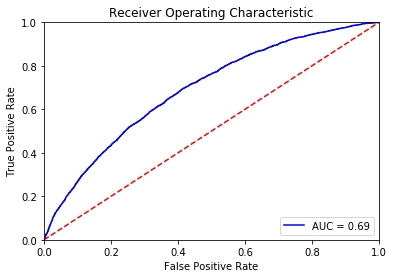

AUC: 0.67236


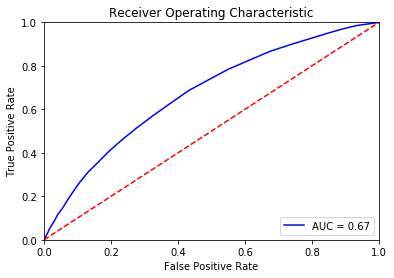

In [0]:
for model in model_dict3:
  # calculate the fpr and tpr for all thresholds of the classification
  pipe_lr = Pipeline([('sc',StandardScaler()),
           ('clf',model_dict3[model])
           ])
  
  probs = pipe_lr.fit(trainX,trainy).predict_proba(testX)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(testy, preds, pos_label="1")
  roc_auc = metrics.auc(fpr, tpr)
  print('AUC: %.5f' % roc_auc)
  # method I: plt

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


# Q5


5.(10 points) Please explain in your own words how you might use the Lasso estimation method to
select a subset of attributes. In particular, please explain what the Lasso parameter is for, and how
increases in change the estimates you obtain from the Lasso.


Lasso parameter λ regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. When λ = 0, the coefficients as simple linear regression. When 0 < λ < ∞, the coefficients between 0 and that of simple linear regression. When λ = ∞, All coefficients zero. Therefore, the minimization objective equals LS Objects + λ * (sum of the absolute value of coefficients)


#Q6

6. (5 points) First, let's use the Lasso approach, and compare it to previous methods. Apply the
Logistic Regression model with Lasso penalization method to the to the default response variable (1 or
0), and the entire set of attributes. For now, set to 0.1. Compute the resulting confusion matrix using
10-fold cross-validation (fill in the table).


In [0]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer

In [0]:
logistic_lasso= LogisticRegressionCV(Cs = 10, cv=10, penalty = 'l1', solver = 'liblinear', )
Model6 = logistic_lasso.fit(X,y)

In [0]:
y_predicted =  Model6.predict(X)
c = confusion_matrix(y, y_predicted)

In [0]:
Nor_cfmat = c/ c.astype(np.float).sum(axis=0)
df_q6 = pd.DataFrame(Nor_cfmat, index = ['Predicted Not Default', 'Predicted Default'], columns = ['Actual Not Default', 'Actual Default'])
print(df_q6)

                       Actual Not Default  Actual Default
Predicted Not Default            0.754048        0.458965
Predicted Default                0.245952        0.541035


#Q7

# 7. (10 points) 
Next, apply the Logistic Regression model with Lasso penalization method to the default
response variable (1 or 0), and the entire set of attributes on the entire dataset (not inside 10-fold
cross-validation) and once again, constrain the model to have at most 10 attributes in it (aim for 8 to
10). Let's call the resulting set of attributes the LASSO-MODEL. What is the value of now? Which
attributes are those? Did your intuition about the correct set of attributes in the REDUCED-MODEL
match the algorithmic results that you obtained from the LASSO-MODEL? Discuss.
Hint: Start with di erent values for , e.g. 1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10, check
the number of coe cients that are zero, and iterate the value of until you get the desired number of
coe cients that are shrunk to zero.


In [0]:
alpha = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
coefficients = []
for c in  alpha:
    LASSO = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    LASSO_MODEL = LASSO.fit(X,y)
    print('alpha:',c )
    coefficients.append(LASSO_MODEL.coef_)

alpha: 1e-15
alpha: 1e-10
alpha: 1e-08
alpha: 1e-05
alpha: 0.0001
alpha: 0.001
alpha: 0.01
alpha: 1
alpha: 5
alpha: 10


In [0]:
for i in range(10):
    print('C:', alpha[i],'|','Number of non-zero coefficients:',np.count_nonzero(coefficients[i]))

C: 1e-15 | Number of non-zero coefficients: 0
C: 1e-10 | Number of non-zero coefficients: 0
C: 1e-08 | Number of non-zero coefficients: 2
C: 1e-05 | Number of non-zero coefficients: 12
C: 0.0001 | Number of non-zero coefficients: 15
C: 0.001 | Number of non-zero coefficients: 20
C: 0.01 | Number of non-zero coefficients: 29
C: 1 | Number of non-zero coefficients: 35
C: 5 | Number of non-zero coefficients: 35
C: 10 | Number of non-zero coefficients: 35


In [0]:
alpha1 = [0.001, 0.002,0.003,0.004,0.005, 0.006,0.007,0.008,0.009,0.01]
coefficients1 = []
for d in  alpha1:
    LASSO1 = LogisticRegression(penalty='l1', C=d, solver='liblinear')
    LASSO_MODEL1 = LASSO1.fit(X,y)
    print('alpha1:',d )
    coefficients1.append(LASSO_MODEL1.coef_)


alpha1: 0.001
alpha1: 0.002
alpha1: 0.003
alpha1: 0.004
alpha1: 0.005
alpha1: 0.006
alpha1: 0.007
alpha1: 0.008
alpha1: 0.009
alpha1: 0.01


In [0]:
for i in range(10):
    print('C:', alpha1[i],'|','Number of non-zero coefficients:',np.count_nonzero(coefficients1[i]))

C: 0.001 | Number of non-zero coefficients: 20
C: 0.002 | Number of non-zero coefficients: 24
C: 0.003 | Number of non-zero coefficients: 24
C: 0.004 | Number of non-zero coefficients: 26
C: 0.005 | Number of non-zero coefficients: 27
C: 0.006 | Number of non-zero coefficients: 27
C: 0.007 | Number of non-zero coefficients: 28
C: 0.008 | Number of non-zero coefficients: 29
C: 0.009 | Number of non-zero coefficients: 29
C: 0.01 | Number of non-zero coefficients: 29


In [0]:
lamda = 1/0.009
print(lamda)

111.11111111111111


#Q8

*8*.Congratulations! You have now estimated a set of different models for default forecasting. Now assume that you are running a bank. Please pick one set of attributes and one algorithm to implement in the bank. Do you now have sufficient information to run a loan business? What else might
you need to consider?

Assume we are running a bank, we are going to create a model for assessing loan risk, identify the safest default risk under different features. 
The first step is feature selection which involved identifying which of the provided characteristics were most indicative. We plan to use  Lasso regression to reduce over-fitting and select a set of ten attributes. 
The next step is creating a model that required taking those features and using the Logistic model to determine the probability of default by given the features we are selected.

However, under this assumption, we still do not have sufficient information to run a loan business. On the one hand, the dataset of attributes we are picked probably contains too much missing data. Although the attributes could get a higher coefficient value, we still need to use their mean instead.  Under this preprocess, it could introduce some bias. On the other hand, there is not a universal algorithm that could perfectly fit every dataset. If we only use one algorithm on implementation, it may cause the execution strategy for this approach to be not comparable.


#Q9

9. (5 points) How do the results using the full set of attributes (FULL-MODEL) compare to those that
you personally selected (REDUCED-MODEL) in order to predict if a loan will default? What do you
think is more important in this particular example, the set of attributes, or the classi cation technique?
Discuss.


The result of the full set of attributes implies around 30% of people will be a default, but the reduced model shows this number should be lower.  In this case, when we manipulate some features incorrectly, it will overfitting or underfitting our analysis. For example, some attributes leak information after the loan has already been funded, some does not alter the borrower's ability to pay back the loan. However, for each classification technique, the results are quite close. Therefore, it is more important to use a different set of attributes. 


#Q10


10. (5 points) Are these the best models you could possibly create? Name one other possible classi
cation technique and any additional attributes that you might be able to add in order to improve the
confusion matrix. Please justify your choices.


We want to use Recursive Feature Elimination (RFE) as another way to choose attributes. RFE is repeatedly constructing a model and choose either the best or worst performing feature, then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. 

In [0]:
y=df_loan["loan_status"]
X=df_loan.iloc[:,df_loan.columns!="loan_status"]
from imblearn.over_sampling import SMOTE  

X_train_raw, y_train = RandomUnderSampler(random_state=0).fit_sample(X_train_raw,y_train)
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['target'])

In [0]:
df_loan_vars=df_loan.columns.values.tolist()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False False  True  True False  True False
 False False False False False False False  True False  True  True False
 False False False False  True False False False False False False]
[ 5  1  1  1  4 11 19  1  1 16  1 15  6 20  7  2 14 21 13  1 17  1  1 23
  3 25 24 12  1 26  9 10 18 22  8]


The RFE has helped us select the following features: 'term','int_rate','sub_grade','dti','fico_range_high','purpose','num_actv_bc_tl','num_il_tl','num_op_rev_tl','revol_bal'

In [0]:
cols = ['term','int_rate','sub_grade','dti','fico_range_high','purpose','num_actv_bc_tl','num_il_tl','num_op_rev_tl','revol_bal']
X=os_data_X[cols]
y=['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

Nor_cfmat = confusion_matrix/ confusion_matrix.astype(np.float).sum(axis=0)
df_q10 = pd.DataFrame(Nor_cfmat, index = ['Predicted Not Default', 'Predicted Default'], columns = ['Actual Not Default', 'Actual Default'])
print(df_q10)

                       Actual Not Default  Actual Default
Predicted Not Default            0.731048        0.518519
Predicted Default                0.268952        0.481481


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     16185
           1       0.48      0.01      0.01      5978

    accuracy                           0.73     22163
   macro avg       0.61      0.50      0.43     22163
weighted avg       0.66      0.73      0.62     22163




#Q11


11. (10 points) Lastly, we will do a proper out-of-sample test of your models, which is the challenge
you would encounter in the real world. For that purpose, t or train your Logistic, LDA and 50-NN
models on the data from Part I (with undersampling), and test them on the datasets (a) and (b) for
Part II (no undersampling - why?). Report the AUC for the three models below. Within each dataset,
compare the relative performance of the three models with your previous results and discuss. Do you
nd overall di erences in performance across datasets? Discuss.



In [0]:
df2=pd.read_csv('/Users/wuyating/Desktop/Assignment/Loan_data_part_II_a.csv')
df2["home_ownership"]=df2["home_ownership"].astype("category")
df2["purpose"]=df2["purpose"].astype("category")
df2["sub_grade"]=df2["sub_grade"].astype("category")
df2["verification_status"]=df2["verification_status"].astype("category")
df2["loan_status"]=np.where(df2["loan_status"] == 'Fail',"1","0")
df2["loan_status"]=df2["loan_status"].astype("category")
df2.dtypes

In [0]:
trainX=features
trainy=y
testX=df2.iloc[:,df2.columns!="loan_status"]
testy=df2["loan_status"]

In [0]:
from sklearn.linear_model import LogisticRegression
model_dict4 = {
    'LDA':LinearDiscriminantAnalysis()
    ,'KNN':KNeighborsClassifier(n_neighbors=50)
    ,'LogReg':LogisticRegression()
}

In [0]:
for model in model_dict4:
  # calculate the fpr and tpr for all thresholds of the classification
  pipe_lr = Pipeline([('sc',StandardScaler()),
           ('clf',model_dict4[model])
           ])
  
  probs = pipe_lr.fit(trainX,trainy).predict_proba(testX)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(testy, preds, pos_label="1")
  roc_auc = metrics.auc(fpr, tpr)
  print('AUC: %.5f' % roc_auc)
  # method I: plt

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


In [0]:
df3=pd.read_csv('/Users/wuyating/Desktop/Assignment/Loan_data_part_II_b.csv')
df3["home_ownership"]=df3["home_ownership"].astype("category")
df3["purpose"]=df3["purpose"].astype("category")
df3["sub_grade"]=df3["sub_grade"].astype("category")
df3["verification_status"]=df3["verification_status"].astype("category")
df3["loan_status"]=np.where(df3["loan_status"] == 'Fail',"1","0")
df3["loan_status"]=df3["loan_status"].astype("category")
df3.dtypes

In [0]:
trainX=features
trainy=y
testX=df3.iloc[:,df2.columns!="loan_status"]
testy=df3["loan_status"]

In [0]:
for model in model_dict4:
  # calculate the fpr and tpr for all thresholds of the classification
  pipe_lr = Pipeline([('sc',StandardScaler()),
           ('clf',model_dict4[model])
           ])
  
  probs = pipe_lr.fit(trainX,trainy).predict_proba(testX)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(testy, preds, pos_label="1")
  roc_auc = metrics.auc(fpr, tpr)
  print('AUC: %.5f' % roc_auc)
  # method I: plt

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
